<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2024/20241008_AnaliseImportanciaVariaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/train.csv")


In [105]:
# Transformação de dados : char em dummy
dummy_sex = pd.get_dummies(df['Sex'])
df['SexFemale'] = dummy_sex['female']

dummy_pclass = pd.get_dummies(df['Pclass'], prefix='Class')
df['Class_1'] = dummy_pclass['Class_1']
df['Class_2'] = dummy_pclass['Class_2']

x_treino, x_teste, y_treino, y_teste = train_test_split(df[[ 'SexFemale', 'Class_1','Class_2', 'Age', 'SibSp', 'Parch']], df['Survived'], test_size=0.32, random_state=25)

In [106]:
# Fazer ajustes "finos" nos parâmetros de um algoritmo é uma técnica
mod = RandomForestClassifier(random_state=25, n_estimators=200)
mod.fit(x_treino, y_treino)
prev = mod.predict(x_teste)
accuracy_score(y_teste, prev)

0.8006993006993007

# Análise de Importância de Variáveis (*features*)
Escopo de uso: importância de uma variável em um modelo preditivo.

Abordagem 1: utilizando "decision split" do Random Forest



In [102]:
print(mod.feature_importances_, mod.feature_names_in_)

[0.28973601 0.03852797 0.0309244  0.24874853 0.05342851 0.0442993
 0.29433528] ['SexFemale' 'Class_1' 'Class_2' 'Age' 'SibSp' 'Parch' 'Fare']


<Axes: >

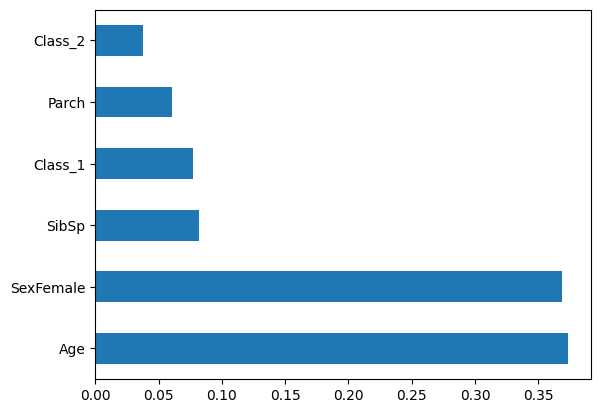

In [107]:
# Visualização Gráfica
feature_importance = pd.Series(mod.feature_importances_, mod.feature_names_in_)
feature_importance.nlargest(7).plot(kind='barh')

# Análise de Importância de Variáveis (*features*)

Abordagem 2: utilizando a técnica de permutação


Text(0.5, 0, 'Permutation Importance')

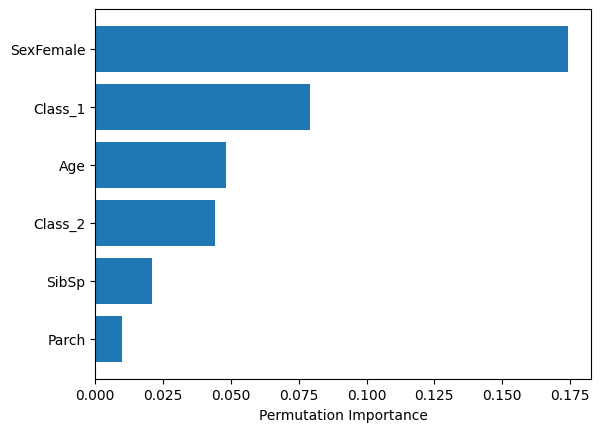

In [112]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

# Permutation executa o "papel" do predict, comparando previsão em teste x erro de previsão
perm_importance = permutation_importance(mod, x_teste, y_teste)

# Visualização gráfica
ordem_idx = perm_importance.importances_mean.argsort()
plt.barh(x_teste.columns[ordem_idx], perm_importance.importances_mean[ordem_idx])
plt.xlabel("Permutation Importance")